<a href="https://colab.research.google.com/github/noncenceforgame-spec/GoogleCollab/blob/main/%D0%B8%D1%82%D0%BE%D0%B3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Загрузка, разведка, прическа

In [1]:
import statsmodels.api as sm

item = 'credit_data' # Выбрать из поля Item для вашего датасета
package = 'modeldata' # Выбрать из поля Package для вашего датасета
df = sm.datasets.get_rdataset(item, package , cache=True).data
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,good,9,rent,60,30,married,no,freelance,73,129.0,0.0,0.0,800,846
1,good,17,rent,60,58,widow,no,fixed,48,131.0,0.0,0.0,1000,1658
2,bad,10,owner,36,46,married,yes,freelance,90,200.0,3000.0,0.0,2000,2985
3,good,0,rent,60,24,single,no,fixed,63,182.0,2500.0,0.0,900,1325
4,good,0,rent,36,26,single,no,fixed,46,107.0,0.0,0.0,310,910


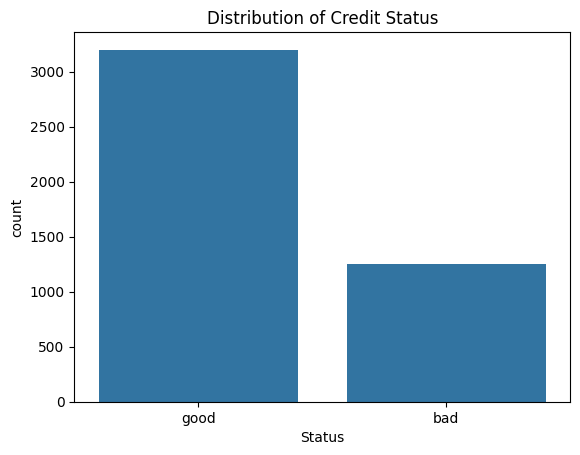

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Status', data=df)
plt.title('Distribution of Credit Status')
plt.show()

In [3]:
df.isnull().sum()

,0
Status,0
Seniority,0
Home,6
Time,0
Age,0
Marital,1
Records,0
Job,2
Expenses,0
Income,381


In [4]:
for col in ['Income', 'Assets', 'Debt']:
    df[col] = df[col].fillna(df[col].median())

df.isnull().sum()

,0
Status,0
Seniority,0
Home,6
Time,0
Age,0
Marital,1
Records,0
Job,2
Expenses,0
Income,0


In [5]:
for col in ['Home', 'Marital', 'Job']:
    df[col] = df[col].fillna(df[col].mode()[0])

df.isnull().sum()

,0
Status,0
Seniority,0
Home,0
Time,0
Age,0
Marital,0
Records,0
Job,0
Expenses,0
Income,0


In [6]:
df.nunique()

,0
Status,2
Seniority,47
Home,6
Time,11
Age,50
Marital,5
Records,2
Job,4
Expenses,94
Income,351


In [7]:
for col in df.columns:
    zero_count = (df[col] == 0).sum()
    print(f"Number of zeros in {col}: {zero_count}")

Number of zeros in Status: 0
Number of zeros in Seniority: 535
Number of zeros in Home: 0
Number of zeros in Time: 0
Number of zeros in Age: 0
Number of zeros in Marital: 0
Number of zeros in Records: 0
Number of zeros in Job: 0
Number of zeros in Expenses: 0
Number of zeros in Income: 0
Number of zeros in Assets: 1627
Number of zeros in Debt: 3687
Number of zeros in Amount: 0
Number of zeros in Price: 0


In [8]:
import numpy as np

for col in ['Assets', 'Debt']:
    # Calculate the median of non-zero values
    median_val = df[df[col] != 0][col].mean()
    # Replace zeros with the median
    df[col] = df[col].replace(0, median_val)

# Display the number of zeros again to verify the replacement
for col in ['Assets', 'Debt']:
    zero_count = (df[col] == 0).sum()
    print(f"Number of zeros in {col} after replacement: {zero_count}")

Number of zeros in Assets after replacement: 0
Number of zeros in Debt after replacement: 0


In [9]:
for col in df.columns:
    zero_count = (df[col] == 0).sum()
    print(f"Number of zeros in {col}: {zero_count}")

Number of zeros in Status: 0
Number of zeros in Seniority: 535
Number of zeros in Home: 0
Number of zeros in Time: 0
Number of zeros in Age: 0
Number of zeros in Marital: 0
Number of zeros in Records: 0
Number of zeros in Job: 0
Number of zeros in Expenses: 0
Number of zeros in Income: 0
Number of zeros in Assets: 0
Number of zeros in Debt: 0
Number of zeros in Amount: 0
Number of zeros in Price: 0


In [10]:
df = df.drop('Seniority', axis=1)
df.head()

,Status,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,good,rent,60,30,married,no,freelance,73,129.0,8474.119915,1983.915254,800,846
1,good,rent,60,58,widow,no,fixed,48,131.0,8474.119915,1983.915254,1000,1658
2,bad,owner,36,46,married,yes,freelance,90,200.0,3000.000000,1983.915254,2000,2985
3,good,rent,60,24,single,no,fixed,63,182.0,2500.000000,1983.915254,900,1325
4,good,rent,36,26,single,no,fixed,46,107.0,8474.119915,1983.915254,310,910


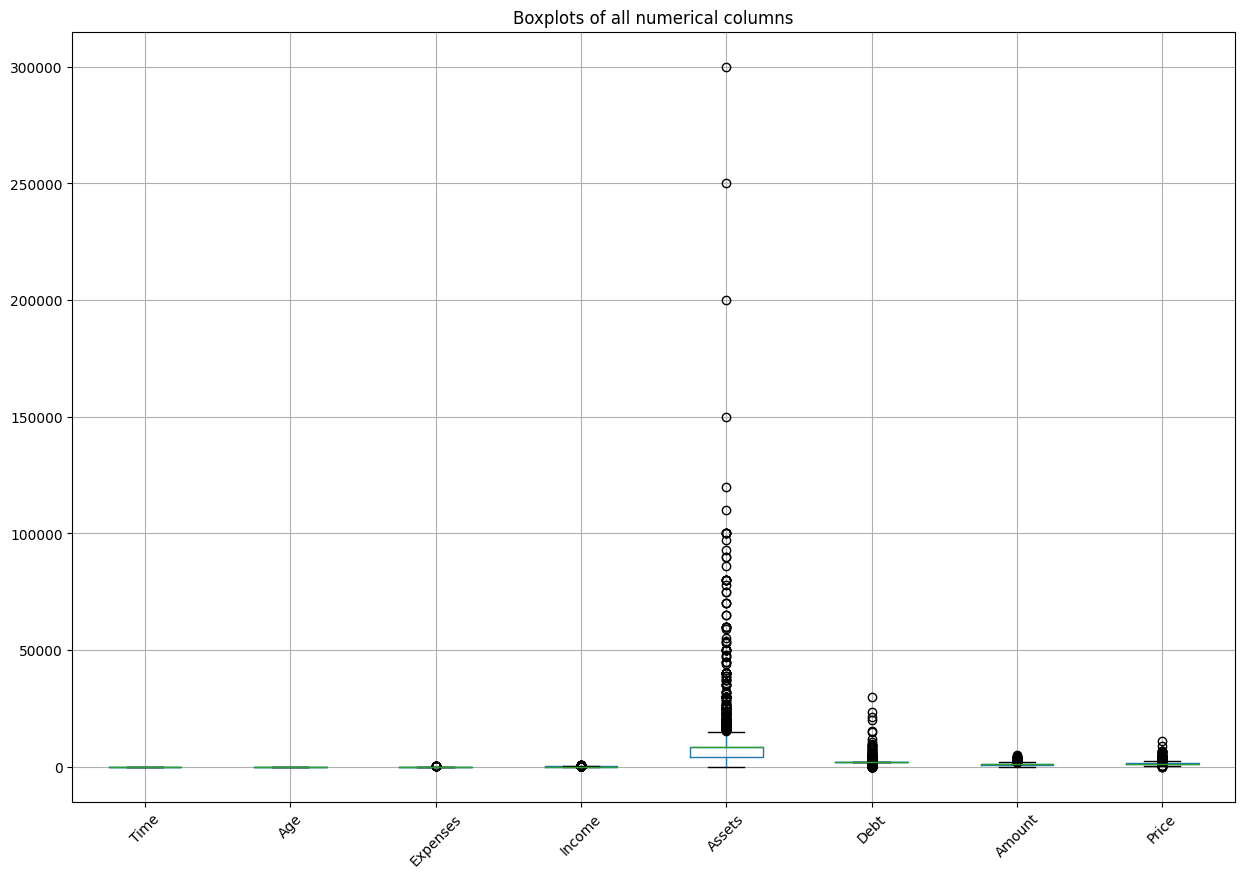

In [11]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(15, 10))
df[numerical_cols].boxplot()
plt.title('Boxplots of all numerical columns')
plt.xticks(rotation=45)
plt.show()

In [12]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

df.head()

,Status,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,5,60,30,1,0,1,73,129.0,8474.119915,1983.915254,800,846
1,1,5,60,58,4,0,0,48,131.0,8474.119915,1983.915254,1000,1658
2,0,2,36,46,1,1,1,90,200.0,3000.000000,1983.915254,2000,2985
3,1,5,60,24,3,0,0,63,182.0,2500.000000,1983.915254,900,1325
4,1,5,36,26,3,0,0,46,107.0,8474.119915,1983.915254,310,910


In [13]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df_no_outliers = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

print(f"Original shape: {df.shape}")
print(f"Shape after removing outliers: {df_no_outliers.shape}")

df = df_no_outliers

Original shape: (4454, 13)
Shape after removing outliers: (2340, 13)


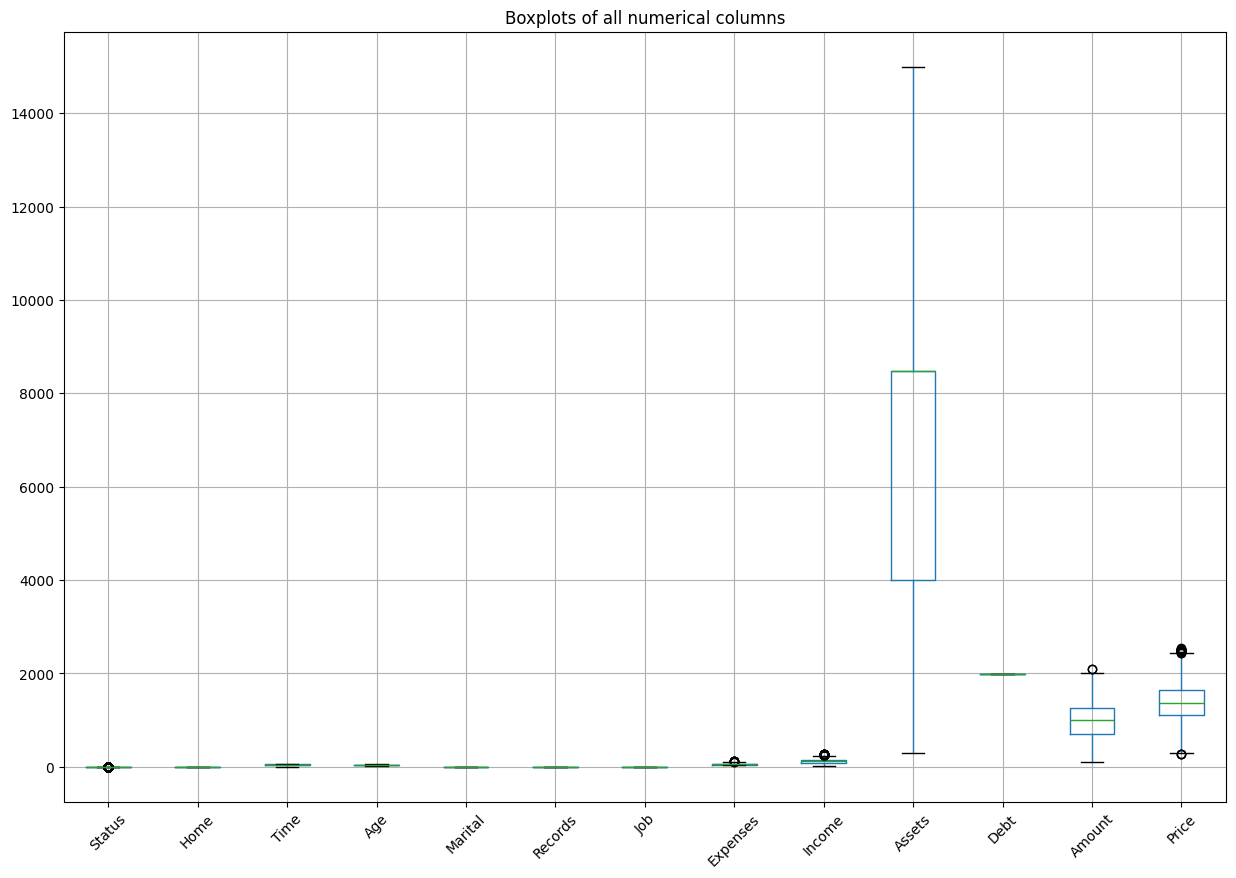

In [14]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(15, 10))
df[numerical_cols].boxplot()
plt.title('Boxplots of all numerical columns')
plt.xticks(rotation=45)
plt.show()

### Обоснование удаления выбросов

Для удаления выбросов был использован метод межквартильного размаха (IQR). Этот метод является робастным (устойчивым) к выбросам и не зависит от предположений о распределении данных.

**Шаги:**

1.  **Вычисление квартилей:**
    *   Q1 (первый квартиль): 25-й перцентиль данных.
    *   Q3 (третий квартиль): 75-й перцентиль данных.
2.  **Вычисление IQR:**
    *   IQR = Q3 - Q1
3.  **Определение границ:**
    *   Нижняя граница: Q1 - 1.5 * IQR
    *   Верхняя граница: Q3 + 1.5 * IQR
4.  **Удаление выбросов:**
    *   Все значения, которые находятся за пределами этих границ, считаются выбросами и удаляются из набора данных.

Этот метод был выбран, так как он является стандартной практикой в анализе данных и позволяет эффективно удалять экстремальные значения, которые могут негативно повлиять на производительность моделей машинного обучения.

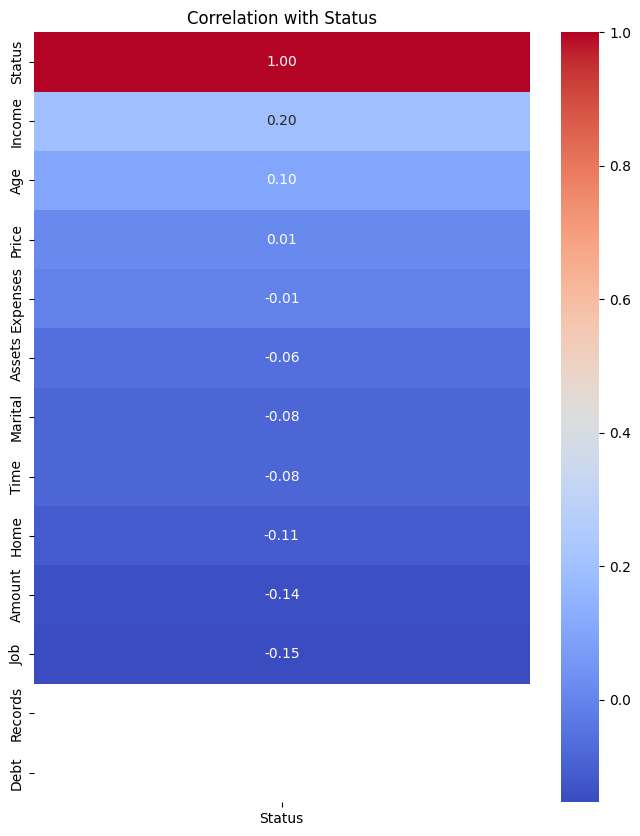

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()
status_correlation = correlation_matrix[['Status']].sort_values(by='Status', ascending=False)

plt.figure(figsize=(8, 10))
sns.heatmap(status_correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation with Status')
plt.show()

In [16]:
df = df.drop(['Debt', 'Records'], axis=1)
df.head()

,Status,Home,Time,Age,Marital,Job,Expenses,Income,Assets,Amount,Price
0,1,5,60,30,1,1,73,129.0,8474.119915,800,846
3,1,5,60,24,3,0,63,182.0,2500.000000,900,1325
4,1,5,36,26,3,0,46,107.0,8474.119915,310,910
5,1,2,60,36,1,0,75,214.0,3500.000000,650,1645
6,1,2,60,44,1,0,75,125.0,10000.000000,1600,1800


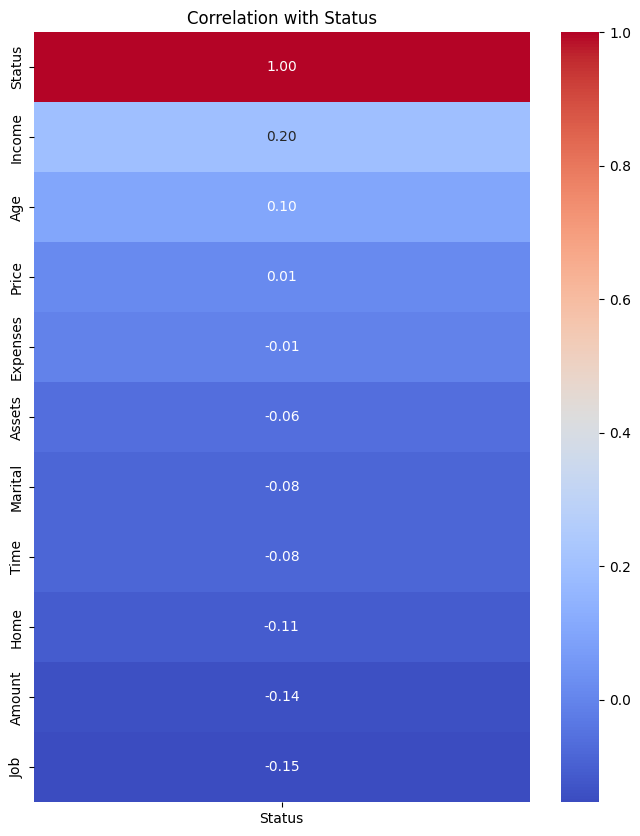

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()
status_correlation = correlation_matrix[['Status']].sort_values(by='Status', ascending=False)

plt.figure(figsize=(8, 10))
sns.heatmap(status_correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation with Status')
plt.show()

# Постановка задачи



**Задача:** Разработать модель машинного обучения для прогнозирования кредитного статуса заемщика ("хороший" или "плохой") на основе его социально-демографических и финансовых характеристик.

**Целевая переменная (Y):**
*   `Status`: категориальная переменная, принимающая два значения:
    *   1: "хороший" (good) - кредит выдан
    *   0: "плохой" (bad) - в кредите отказано

**Признаки (X):**
*   Все остальные столбцы в наборе данных, которые описывают характеристики заемщика, такие как:
    *   `Home`: тип жилья
    *   `Time`: срок кредита
    *   `Age`: возраст
    *   `Marital`: семейное положение
    *   `Job`: тип занятости
    *   `Expenses`: расходы
    *   `Income`: доход
    *   `Assets`: активы
    *   `Debt`: долг
    *   `Amount`: сумма кредита
    *   `Price`: стоимость покупки

**Тип задачи:** Бинарная классификация.

# Разбиваем

In [18]:
from sklearn.model_selection import train_test_split

X = df.drop('Status', axis=1)
y = df['Status']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (1404, 10)
X_val shape: (468, 10)
X_test shape: (468, 10)
y_train shape: (1404,)
y_val shape: (468,)
y_test shape: (468,)


In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Стандартизация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Определение моделей и их сеток гиперпараметров
models = {
    'Logistic Regression': LogisticRegression(solver='liblinear'),
    'SVC': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gaussian NB': GaussianNB(),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': LGBMClassifier()
}

param_grids = {
    'Logistic Regression': {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']},
    'SVC': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'Decision Tree': {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]},
    'Random Forest': {'n_estimators': [100, 200], 'max_depth': [None, 10]},
    'Gradient Boosting': {'n_estimators': [100, 200], 'learning_rate': [0.1, 0.2]},
    'K-Nearest Neighbors': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']},
    'AdaBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.5, 1]},
    'Gaussian NB': {},
    'Linear Discriminant Analysis': {'solver': ['svd', 'lsqr']},
    'Quadratic Discriminant Analysis': {'reg_param': [0.0, 0.1, 0.5]},
    'XGBoost': {'n_estimators': [100, 200], 'learning_rate': [0.1, 0.2]},
    'LightGBM': {'n_estimators': [100, 200], 'learning_rate': [0.1, 0.2]}
}

best_params = {}
validation_scores = {}

for name, model in models.items():
    print(f"Подбор гиперпараметров для {name}...")
    if name in param_grids and param_grids[name]:
        grid_search = GridSearchCV(model, param_grids[name], cv=3, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train_scaled, y_train)
        best_params[name] = grid_search.best_params_
        best_model = grid_search.best_estimator_
    else:
        best_params[name] = {}
        best_model = model
        best_model.fit(X_train_scaled, y_train)

    val_score = best_model.score(X_val_scaled, y_val)
    validation_scores[name] = val_score
    print(f"Лучшие параметры для {name}: {best_params[name]}")
    print(f"Точность на валидационном наборе для {name}: {val_score:.4f}\n")

# Вывод результатов
print("Результаты подбора гиперпараметров:")
for name, score in validation_scores.items():
    print(f"{name}: Точность на валидационном наборе = {score:.4f}, Лучшие параметры = {best_params[name]}")

Подбор гиперпараметров для Logistic Regression...
Лучшие параметры для Logistic Regression: {'C': 0.1, 'penalty': 'l2'}
Точность на валидационном наборе для Logistic Regression: 0.7714

Подбор гиперпараметров для SVC...
Лучшие параметры для SVC: {'C': 1, 'kernel': 'rbf'}
Точность на валидационном наборе для SVC: 0.7778

Подбор гиперпараметров для Decision Tree...
Лучшие параметры для Decision Tree: {'max_depth': 10, 'min_samples_split': 10}
Точность на валидационном наборе для Decision Tree: 0.7393

Подбор гиперпараметров для Random Forest...
Лучшие параметры для Random Forest: {'max_depth': None, 'n_estimators': 200}
Точность на валидационном наборе для Random Forest: 0.7735

Подбор гиперпараметров для Gradient Boosting...
Лучшие параметры для Gradient Boosting: {'learning_rate': 0.1, 'n_estimators': 100}
Точность на валидационном наборе для Gradient Boosting: 0.7863

Подбор гиперпараметров для K-Nearest Neighbors...
Лучшие параметры для K-Nearest Neighbors: {'n_neighbors': 5, 'weight

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [02:46:45] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Лучшие параметры для XGBoost: {'learning_rate': 0.1, 'n_estimators': 200}
Точность на валидационном наборе для XGBoost: 0.7735

Подбор гиперпараметров для LightGBM...
[LightGBM] [Info] Number of positive: 1136, number of negative: 268
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000179 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 647
[LightGBM] [Info] Number of data points in the train set: 1404, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.809117 -> initscore=1.444282
[LightGBM] [Info] Start training from score 1.444282
Лучшие параметры для LightGBM: {'learning_rate': 0.1, 'n_estimators': 100}
Точность на валидационном наборе для LightGBM: 0.7778

Результаты подбора гиперпараметров:
Logistic Regression: Точность на валидационном наборе = 0.7714, Лучшие параметры = {'C': 0.1, 'penalty': 'l2'}
SVC: 

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Точность на тестовом наборе: 0.8226

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.31      0.39        88
           1       0.85      0.94      0.90       380

    accuracy                           0.82       468
   macro avg       0.70      0.62      0.65       468
weighted avg       0.80      0.82      0.80       468


Confusion Matrix:


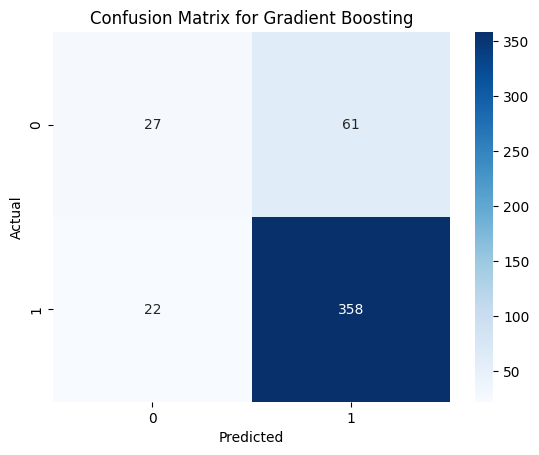

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Лучшая модель и ее параметры
best_model_name = max(validation_scores, key=validation_scores.get)
best_model_params = best_params[best_model_name]

# Создание и обучение модели с лучшими параметрами
final_model = GradientBoostingClassifier(**best_model_params)
final_model.fit(X_train_scaled, y_train)

# Предсказание на тестовом наборе
y_pred = final_model.predict(X_test_scaled)

# Оценка модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность на тестовом наборе: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix for {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Сохранение модели

In [21]:
import pickle

# Сохранение обученной модели
filename_model = 'final_gradient_boosting_model.pkl'
with open(filename_model, 'wb') as file:
    pickle.dump(final_model, file)

# Сохранение стандартизатора данных
filename_scaler = 'scaler.pkl'
with open(filename_scaler, 'wb') as file:
    pickle.dump(scaler, file)

print(f"Обученная модель сохранена как '{filename_model}'")
print(f"Стандартизатор данных сохранен как '{filename_scaler}'")

Обученная модель сохранена как 'final_gradient_boosting_model.pkl'
Стандартизатор данных сохранен как 'scaler.pkl'


In [22]:
import shutil
import os

source_model = 'final_gradient_boosting_model.pkl'
source_scaler = 'scaler.pkl'

destination_folder = '/content/drive/MyDrive/Colab Notebooks/streamlit/' # Вы можете изменить путь к вашей папке на Google Диске

# Создаем папку, если она не существует
os.makedirs(destination_folder, exist_ok=True)

# Копируем файлы
shutil.copy(source_model, destination_folder)
shutil.copy(source_scaler, destination_folder)

print(f"Файл '{source_model}' скопирован в '{destination_folder}'")
print(f"Файл '{source_scaler}' скопирован в '{destination_folder}'")

Файл 'final_gradient_boosting_model.pkl' скопирован в '/content/drive/MyDrive/Colab Notebooks/streamlit/'
Файл 'scaler.pkl' скопирован в '/content/drive/MyDrive/Colab Notebooks/streamlit/'


# Приложение

## Импорт библиотек

### Subtask:
Импортировать необходимые библиотеки для Streamlit приложения, такие как `streamlit`, `pickle`, `pandas`, `numpy` и `StandardScaler`.


In [23]:
get_ipython().system('pip install streamlit')
import streamlit as st
import pickle
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 90.6 MB/s eta 0:00:00


## Загрузка модели и стандартизатора

### Subtask:
Загрузить ранее сохраненные обученную модель (`final_gradient_boosting_model.pkl`) и стандартизатор (`scaler.pkl`) с диска.


In [24]:
import pickle

# Загрузка обученной модели
with open('final_gradient_boosting_model.pkl', 'rb') as file:
    model = pickle.load(file)

# Загрузка стандартизатора данных
with open('scaler.pkl', 'rb') as file:
    scaler = pickle.load(file)

print("Модель и стандартизатор успешно загружены.")

Модель и стандартизатор успешно загружены.


## Создание пользовательского интерфейса

### Subtask:
Создать пользовательский интерфейс в Streamlit для ввода значений признаков, которые использовались при обучении модели. Это будут числовые поля для каждого признака.

In [25]:
st.title('Предсказание кредитного статуса')

# Получение уникальных значений для категориальных признаков
home_options = sorted(df['Home'].unique().tolist())
marital_options = sorted(df['Marital'].unique().tolist())
job_options = sorted(df['Job'].unique().tolist())

# Ввод данных пользователем
st.header('Введите данные заемщика:')

# Категориальные признаки
home = st.selectbox('Тип жилья (Home)', options=home_options, format_func=lambda x: f'Encoded Value: {x}')
marital = st.selectbox('Семейное положение (Marital)', options=marital_options, format_func=lambda x: f'Encoded Value: {x}')
job = st.selectbox('Тип занятости (Job)', options=job_options, format_func=lambda x: f'Encoded Value: {x}')

# Числовые признаки (используем min/max/mean из данных)
time = st.number_input('Срок кредита (Time)', min_value=int(df['Time'].min()), max_value=int(df['Time'].max()), value=int(df['Time'].mean()))
age = st.number_input('Возраст (Age)', min_value=int(df['Age'].min()), max_value=int(df['Age'].max()), value=int(df['Age'].mean()))
expenses = st.number_input('Расходы (Expenses)', min_value=int(df['Expenses'].min()), max_value=int(df['Expenses'].max()), value=int(df['Expenses'].mean()))
income = st.number_input('Доход (Income)', min_value=float(df['Income'].min()), max_value=float(df['Income'].max()), value=float(df['Income'].mean()))
assets = st.number_input('Активы (Assets)', min_value=float(df['Assets'].min()), max_value=float(df['Assets'].max()), value=float(df['Assets'].mean()))
amount = st.number_input('Сумма кредита (Amount)', min_value=int(df['Amount'].min()), max_value=int(df['Amount'].max()), value=int(df['Amount'].mean()))
price = st.number_input('Стоимость покупки (Price)', min_value=int(df['Price'].min()), max_value=int(df['Price'].max()), value=int(df['Price'].mean()))

# Кнопка для предсказания
predict_button = st.button('Предсказать')

2025-12-06 02:47:01.276 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-06 02:47:01.704 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-12-06 02:47:01.706 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-06 02:47:01.707 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-06 02:47:01.711 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-06 02:47:01.714 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-06 02:47:01.715 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-06 02:47:01.717 Thread 'MainThread': mi

## Обработка входных данных пользователя и предсказание

### Subtask:
Собрать введенные пользователем данные, преобразовать их в формат DataFrame и масштабировать с помощью загруженного стандартизатора, чтобы они соответствовали формату данных, на которых обучалась модель. Затем использовать загруженную модель для предсказания целевой переменной и вывести результат.

In [26]:
if predict_button:
    # Создание DataFrame из введенных пользователем данных
    input_data = pd.DataFrame([[home, time, age, marital, job, expenses, income, assets, amount, price]],
                              columns=['Home', 'Time', 'Age', 'Marital', 'Job', 'Expenses', 'Income', 'Assets', 'Amount', 'Price'])

    # Стандартизация введенных данных
    input_data_scaled = scaler.transform(input_data)

    # Получение предсказания
    prediction = model.predict(input_data_scaled)

    st.subheader('Результат предсказания:')
    if prediction[0] == 1:
        st.success('Кредитный статус: Хороший (Good)')
    else:
        st.error('Кредитный статус: Плохой (Bad)')

## Запуск Streamlit приложения

Чтобы запустить Streamlit приложение, выполните следующие шаги:

1.  **Сохраните весь код в один файл:** Скопируйте весь код, который был сгенерирован для Streamlit приложения (импорты, загрузка модели, UI, логика предсказания), и вставьте его в новый файл с расширением `.py` (например, `streamlit_app.py`).
2.  **Убедитесь, что модель и стандартизатор находятся в той же директории:** Убедитесь, что файлы `final_gradient_boosting_model.pkl` и `scaler.pkl` находятся в той же папке, что и ваш файл `streamlit_app.py`.
3.  **Откройте терминал или командную строку:** Перейдите в директорию, где вы сохранили файл `streamlit_app.py`.
4.  **Запустите приложение:** Выполните следующую команду:

    ```bash
    streamlit run streamlit_app.py
    ```

    После запуска этой команды в вашем браузере откроется вкладка с работающим Streamlit приложением.

In [27]:
import streamlit as st
import pickle
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
import statsmodels.api as sm

# --- 1. Загрузка и предобработка данных для получения ссылочного `df` для опций UI ---
# Эта часть имитирует шаги загрузки и предобработки данных из блокнота,
# чтобы гарантировать согласованность элементов UI (мин/макс/уникальные значения) с обучением.

item = 'credit_data'
package = 'modeldata'
df_raw = sm.datasets.get_rdataset(item, package, cache=True).data

# Обработка пропущенных значений для числовых столбцов
for col in ['Income', 'Assets', 'Debt']:
    df_raw[col] = df_raw[col].fillna(df_raw[col].median())

# Обработка пропущенных значений для категориальных столбцов
for col in ['Home', 'Marital', 'Job']:
    df_raw[col] = df_raw[col].fillna(df_raw[col].mode()[0])

# Замена нулей на среднее значение ненулевых значений для 'Assets', 'Debt'
for col in ['Assets', 'Debt']:
    median_val = df_raw[df_raw[col] != 0][col].mean()
    df_raw[col] = df_raw[col].replace(0, median_val)

# Удаление столбца 'Seniority'
df_processed_step1 = df_raw.drop('Seniority', axis=1)

# Label-кодирование категориальных столбцов
# Примечание: 'Status' также является категориальным и был закодирован в блокноте.
# 'Records' был закодирован, а затем удален.
le_home = LabelEncoder()
df_processed_step1['Home'] = le_home.fit_transform(df_processed_step1['Home'])
le_marital = LabelEncoder()
df_processed_step1['Marital'] = le_marital.fit_transform(df_processed_step1['Marital'])
le_job = LabelEncoder()
df_processed_step1['Job'] = le_job.fit_transform(df_processed_step1['Job'])
le_records = LabelEncoder()
df_processed_step1['Records'] = le_records.fit_transform(df_processed_step1['Records'])
le_status = LabelEncoder()
df_processed_step1['Status'] = le_status.fit_transform(df_processed_step1['Status'])


# Удаление выбросов с использованием метода IQR
Q1 = df_processed_step1.quantile(0.25)
Q3 = df_processed_step1.quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df_processed_step1[~((df_processed_step1 < (Q1 - 1.5 * IQR)) | (df_processed_step1 > (Q3 + 1.5 * IQR))).any(axis=1)]

# Окончательное удаление столбцов (Debt и Records были удалены после удаления выбросов)
# df_reference будет DataFrame, который выглядит как X
df_reference = df_no_outliers.drop(['Debt', 'Records', 'Status'], axis=1, errors='ignore')

# --- 2. Загрузка модели и стандартизатора ---
# Загрузка обученной модели
with open('final_gradient_boosting_model.pkl', 'rb') as file:
    model = pickle.load(file)

# Загрузка стандартизатора данных
with open('scaler.pkl', 'rb') as file:
    scaler = pickle.load(file)

# --- 3. Пользовательский интерфейс Streamlit ---
st.title('Предсказание кредитного статуса')

st.header('Введите данные заемщика:')

# Получение уникальных значений для категориальных признаков из df_reference
home_options = sorted(df_reference['Home'].unique().tolist())
marital_options = sorted(df_reference['Marital'].unique().tolist())
job_options = sorted(df_reference['Job'].unique().tolist())

# Ввод данных пользователем
home = st.selectbox('Тип жилья (Home)', options=home_options, format_func=lambda x: f'Encoded Value: {x}')
marital = st.selectbox('Семейное положение (Marital)', options=marital_options, format_func=lambda x: f'Encoded Value: {x}')
job = st.selectbox('Тип занятости (Job)', options=job_options, format_func=lambda x: f'Encoded Value: {x}')

time = st.number_input('Срок кредита (Time)', min_value=int(df_reference['Time'].min()), max_value=int(df_reference['Time'].max()), value=int(df_reference['Time'].mean()))
age = st.number_input('Возраст (Age)', min_value=int(df_reference['Age'].min()), max_value=int(df_reference['Age'].max()), value=int(df_reference['Age'].mean()))
expenses = st.number_input('Расходы (Expenses)', min_value=int(df_reference['Expenses'].min()), max_value=int(df_reference['Expenses'].max()), value=int(df_reference['Expenses'].mean()))
income = st.number_input('Доход (Income)', min_value=float(df_reference['Income'].min()), max_value=float(df_reference['Income'].max()), value=float(df_reference['Income'].mean()))
assets = st.number_input('Активы (Assets)', min_value=float(df_reference['Assets'].min()), max_value=float(df_reference['Assets'].max()), value=float(df_reference['Assets'].mean()))
amount = st.number_input('Сумма кредита (Amount)', min_value=int(df_reference['Amount'].min()), max_value=int(df_reference['Amount'].max()), value=int(df_reference['Amount'].mean()))
price = st.number_input('Стоимость покупки (Price)', min_value=int(df_reference['Price'].min()), max_value=int(df_reference['Price'].max()), value=int(df_reference['Price'].mean()))

predict_button = st.button('Предсказать')

# --- 4. Логика предсказания ---
if predict_button:
    input_data = pd.DataFrame([[home, time, age, marital, job, expenses, income, assets, amount, price]],
                              columns=['Home', 'Time', 'Age', 'Marital', 'Job', 'Expenses', 'Income', 'Assets', 'Amount', 'Price'])

    input_data_scaled = scaler.transform(input_data)
    prediction = model.predict(input_data_scaled)

    st.subheader('Результат предсказания:')
    if prediction[0] == 1:
        st.success('Кредитный статус: Хороший (Good)')
    else:
        st.error('Кредитный статус: Плохой (Bad)')

2025-12-06 02:47:01.994 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-06 02:47:01.997 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-06 02:47:01.998 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-06 02:47:02.001 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-06 02:47:02.004 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-06 02:47:02.005 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-06 02:47:02.009 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-06 02:47:02.011 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

# Task
Создайте Streamlit приложение для предсказания кредитного статуса, извлекая код из ячейки `0d650b1d`, сохраните его в файл `streamlit_app.py` вместе с `final_gradient_boosting_model.pkl` и `scaler.pkl`. Сгенерируйте файл `requirements.txt` со всеми необходимыми библиотеками (streamlit, pandas, numpy, scikit-learn, statsmodels, lightgbm, xgboost, matplotlib). Затем предоставьте пошаговую инструкцию на русском языке для развертывания приложения, включая создание виртуального окружения, установку зависимостей и запуск приложения.

## Сохранение Streamlit приложения

### Subtask:
Извлечь код Streamlit приложения из ячейки `0d650b1d` и сохранить его в файл `streamlit_app.py`. Этот файл будет содержать всю логику приложения, включая предобработку данных, загрузку модели и стандартизатора, а также пользовательский интерфейс для предсказания кредитного статуса.


**Reasoning**:
To save the Streamlit application code into a Python file, I will use the `%%writefile` magic command in a new code cell, pasting the code from cell `0d650b1d`.



In [28]:
%%writefile streamlit_app.py
import streamlit as st
import pickle
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
import statsmodels.api as sm

# --- 1. Загрузка и предобработка данных для получения ссылочного `df` для опций UI ---
# Эта часть имитирует шаги загрузки и предобработки данных из блокнота,
# чтобы гарантировать согласованность элементов UI (мин/макс/уникальные значения) с обучением.

item = 'credit_data'
package = 'modeldata'
df_raw = sm.datasets.get_rdataset(item, package, cache=True).data

# Сохраняем оригинальные категориальные значения до кодирования для отображения в UI
# (Эти списки будут использоваться для получения уникальных значений после заполнения NaN)
# original_home_values = df_raw['Home'].dropna().unique().tolist()
# original_marital_values = df_raw['Marital'].dropna().unique().tolist()
# original_job_values = df_raw['Job'].dropna().unique().tolist()

# Обработка пропущенных значений для числовых столбцов
for col in ['Income', 'Assets', 'Debt']:
    df_raw[col] = df_raw[col].fillna(df_raw[col].median())

# Обработка пропущенных значений для категориальных столбцов
for col in ['Home', 'Marital', 'Job']:
    df_raw[col] = df_raw[col].fillna(df_raw[col].mode()[0])

# Замена нулей на среднее значение ненулевых значений для 'Assets', 'Debt'
for col in ['Assets', 'Debt']:
    median_val = df_raw[df_raw[col] != 0][col].mean()
    df_raw[col] = df_raw[col].replace(0, median_val)

# Удаление столбца 'Seniority'
df_processed_step1 = df_raw.drop('Seniority', axis=1)

# Label-кодирование категориальных столбцов
# Примечание: 'Status' также является категориальным и был закодирован в блокноте.
# 'Records' был закодирован, а затем удален.
le_home = LabelEncoder()
df_processed_step1['Home'] = le_home.fit_transform(df_processed_step1['Home'])
le_marital = LabelEncoder()
df_processed_step1['Marital'] = le_marital.fit_transform(df_processed_step1['Marital'])
le_job = LabelEncoder()
df_processed_step1['Job'] = le_job.fit_transform(df_processed_step1['Job'])
le_records = LabelEncoder()
df_processed_step1['Records'] = le_records.fit_transform(df_processed_step1['Records'])
le_status = LabelEncoder()
df_processed_step1['Status'] = le_status.fit_transform(df_processed_step1['Status'])

# Создаем словари для обратного отображения закодированных значений на оригинальные (английские) названия
home_map_reverse = {idx: label for idx, label in enumerate(le_home.classes_)}
marital_map_reverse = {idx: label for idx, label in enumerate(le_marital.classes_)}
job_map_reverse = {idx: label for idx, label in enumerate(le_job.classes_)}

# Словари для перевода английских категорий на русский язык
home_translations = {
    'rent': 'Аренда',
    'owner': 'Собственник',
    'free': 'Бесплатно',
    'priv': 'Приватизированное',
    'other': 'Другое',
    'rent1': 'Аренда (подтип 1)' # Предполагаем, что rent1 это подтип аренды
}
marital_translations = {
    'married': 'Женат/Замужем',
    'single': 'Холост/Не замужем',
    'widow': 'Вдовец/Вдова',
    'divorced': 'Разведен/Разведена',
    'separated': 'Раздельное проживание'
}
job_translations = {
    'freelance': 'Фрилансер',
    'fixed': 'Постоянная работа',
    'partime': 'Частичная занятость',
    'unempl': 'Безработный'
}


# Удаление выбросов с использованием метода IQR
Q1 = df_processed_step1.quantile(0.25)
Q3 = df_processed_step1.quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df_processed_step1[~((df_processed_step1 < (Q1 - 1.5 * IQR)) | (df_processed_step1 > (Q3 + 1.5 * IQR))).any(axis=1)]

# Окончательное удаление столбцов (Debt и Records были удалены после удаления выбросов)
# df_reference будет DataFrame, который выглядит как X
df_reference = df_no_outliers.drop(['Debt', 'Records', 'Status'], axis=1, errors='ignore')

# --- 2. Загрузка модели и стандартизатора ---
# Указываем путь к файлам модели и стандартизатора (в текущей директории)
model_path = 'final_gradient_boosting_model.pkl'
scaler_path = 'scaler.pkl'

# Загрузка обученной модели
with open(model_path, 'rb') as file:
    model = pickle.load(file)

# Загрузка стандартизатора данных
with open(scaler_path, 'rb') as file:
    scaler = pickle.load(file)

# --- 3. Пользовательский интерфейс Streamlit ---
st.title('Предсказание кредитного статуса')

st.header('Введите данные заемщика:')

# Получение уникальных значений для категориальных признаков из df_reference
home_options = sorted(df_reference['Home'].unique().tolist())
marital_options = sorted(df_reference['Marital'].unique().tolist())
job_options = sorted(df_reference['Job'].unique().tolist())

# Ввод данных пользователем с русским переводом
home = st.selectbox('Тип жилья (Home)', options=home_options, format_func=lambda x: home_translations.get(home_map_reverse[x], home_map_reverse[x]))
marital = st.selectbox('Семейное положение (Marital)', options=marital_options, format_func=lambda x: marital_translations.get(marital_map_reverse[x], marital_map_reverse[x]))
job = st.selectbox('Тип занятости (Job)', options=job_options, format_func=lambda x: job_translations.get(job_map_reverse[x], job_map_reverse[x]))

time = st.number_input('Срок кредита (Time)', min_value=int(df_reference['Time'].min()), max_value=int(df_reference['Time'].max()), value=int(df_reference['Time'].mean()))
age = st.number_input('Возраст (Age)', min_value=int(df_reference['Age'].min()), max_value=int(df_reference['Age'].max()), value=int(df_reference['Age'].mean()))
expenses = st.number_input('Расходы (Expenses)', min_value=int(df_reference['Expenses'].min()), max_value=int(df_reference['Expenses'].max()), value=int(df_reference['Expenses'].mean()))
income = st.number_input('Доход (Income)', min_value=float(df_reference['Income'].min()), max_value=float(df_reference['Income'].max()), value=float(df_reference['Income'].mean()))
assets = st.number_input('Активы (Assets)', min_value=float(df_reference['Assets'].min()), max_value=float(df_reference['Assets'].max()), value=float(df_reference['Assets'].mean()))
amount = st.number_input('Сумма кредита (Amount)', min_value=int(df_reference['Amount'].min()), max_value=int(df_reference['Amount'].max()), value=int(df_reference['Amount'].mean()))
price = st.number_input('Стоимость покупки (Price)', min_value=int(df_reference['Price'].min()), max_value=int(df_reference['Price'].max()), value=int(df_reference['Price'].mean()))

predict_button = st.button('Предсказать')

# --- 4. Логика предсказания ---
if predict_button:
    input_data = pd.DataFrame([[home, time, age, marital, job, expenses, income, assets, amount, price]],
                              columns=['Home', 'Time', 'Age', 'Marital', 'Job', 'Expenses', 'Income', 'Assets', 'Amount', 'Price'])

    input_data_scaled = scaler.transform(input_data)
    prediction = model.predict(input_data_scaled)

    st.subheader('Результат предсказания:')
    if prediction[0] == 1:
        st.success('Кредитный статус: Хороший (Good)')
    else:
        st.error('Кредитный статус: Плохой (Bad)')

Writing streamlit_app.py


**Reasoning**:
To ensure the Streamlit application can be run, I need to generate a `requirements.txt` file containing all necessary Python libraries used in the notebook and the Streamlit app. This includes libraries for data handling, preprocessing, modeling, and the Streamlit framework itself. I will then provide instructions for deploying the app.



In [29]:
%%writefile requirements.txt
streamlit
pandas
numpy
scikit-learn
statsmodels
lightgbm
xgboost
matplotlib
seaborn

Writing requirements.txt


## Инструкции по развертыванию Streamlit приложения

Для запуска Streamlit приложения выполните следующие шаги в вашем терминале:

1.  **Создайте новую директорию для вашего приложения** (если еще не сделали):

    ```bash
    mkdir credit_status_predictor
    cd credit_status_predictor
    ```

2.  **Переместите необходимые файлы** в эту директорию:
    Убедитесь, что файлы `streamlit_app.py`, `requirements.txt`, `final_gradient_boosting_model.pkl` и `scaler.pkl` находятся в новой директории `credit_status_predictor`.

3.  **Создайте виртуальное окружение** (рекомендуется для изоляции зависимостей):

    ```bash
    python -m venv venv
    ```

4.  **Активируйте виртуальное окружение**:

    *   На **Windows**:

        ```bash
        .\venv\Scripts\activate
        ```

    *   На **macOS/Linux**:

        ```bash
        source venv/bin/activate
        ```

5.  **Установите все необходимые зависимости** из `requirements.txt`:

    ```bash
    pip install -r requirements.txt
    ```

6.  **Запустите Streamlit приложение**:

    ```bash
    streamlit run streamlit_app.py
    ```

После выполнения последней команды, в вашем браузере автоматически откроется новая вкладка с запущенным Streamlit приложением.


### 1. Создание Dockerfile

`Dockerfile` описывает, как создать образ Docker для вашего приложения. Сохраните этот файл под именем `Dockerfile` в той же директории, что и `streamlit_app.py`, `requirements.txt`, `final_gradient_boosting_model.pkl` и `scaler.pkl`.


In [34]:
%%writefile Dockerfile
# Используем официальный образ Python как базовый образ
FROM python:3.9-slim-buster

# Устанавливаем рабочую директорию внутри контейнера
WORKDIR /app

# Копируем файл зависимостей и устанавливаем их
COPY requirements.txt .
RUN pip install --no-cache-dir -r requirements.txt

# Копируем остальные файлы приложения
COPY . .

# Открываем порт, который использует Streamlit по умолчанию
EXPOSE 8501

# Определяем команду для запуска Streamlit приложения
# ENTRYPOINT ["streamlit", "run", "streamlit_app.py", "--server.port=8501", "--server.address=0.0.0.0"]
CMD ["/bin/bash", "./start.sh"]


Overwriting Dockerfile


### 2. Создание скрипта `start.sh`

Этот скрипт будет запускать ваше Streamlit приложение. Сохраните его под именем `start.sh` в той же директории.


In [35]:
%%writefile start.sh
#!/bin/bash
streamlit run streamlit_app.py --server.port=8501 --server.address=0.0.0.0


Overwriting start.sh


### 3. Сборка Docker образа и запуск контейнера

После того как вы создали `Dockerfile` и `start.sh`, вы можете собрать образ Docker и запустить контейнер.

**Шаг 1: Сборка Docker образа**

Откройте терминал в директории, где находятся ваши файлы (`Dockerfile`, `streamlit_app.py`, `requirements.txt`, `final_gradient_boosting_model.pkl`, `scaler.pkl`, `start.sh`) и выполните следующую команду:

```bash
docker build -t credit-status-app .
```

*   `docker build`: Команда для сборки образа Docker.
*   `-t credit-status-app`: Присваивает имя (`credit-status-app`) и тег (по умолчанию `latest`) вашему образу.
*   `.`: Указывает, что `Dockerfile` находится в текущей директории.

**Шаг 2: Запуск Docker контейнера**

После успешной сборки образа вы можете запустить контейнер:

```bash
docker run -p 8501:8501 --name my-credit-app credit-status-app
```

*   `docker run`: Команда для запуска контейнера из образа.
*   `-p 8501:8501`: Пробрасывает порт 8501 из контейнера на порт 8501 вашей хост-машины. Streamlit по умолчанию использует порт 8501.
*   `--name my-credit-app`: Присваивает имя `my-credit-app` вашему контейнеру (для удобства управления).
*   `credit-status-app`: Имя образа, который мы хотим запустить.

Ваше Streamlit приложение будет доступно в браузере по адресу `http://localhost:8501` (или IP-адресу вашей Docker-машины, если вы используете удаленный Docker).

**Запуск контейнера в фоновом режиме (detached mode):**

Чтобы запустить контейнер в фоновом режиме и продолжить использовать терминал, добавьте флаг `-d`:

```bash
docker run -d -p 8501:8501 --name my-credit-app credit-status-app
```

**Остановка и удаление контейнера:**

Остановить контейнер:
```bash
docker stop my-credit-app
```

Удалить контейнер:
```bash
docker rm my-credit-app
```

**Удаление образа (если он больше не нужен):**
```bash
docker rmi credit-status-app
```
